In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns
import holidays
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (explained_variance_score, 
                             mean_absolute_error, 
                             mean_squared_error, 
                             mean_squared_log_error,
                             r2_score)
from sklearn.model_selection import (GridSearchCV,
                                     TimeSeriesSplit)
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline


from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import RandomizedSearchCV

import xgboost as xgb
from xgboost import plot_importance, plot_tree
from helper import find_row_by_index

c:\Users\augusto.lourencatto\Desktop\me\TCC\venv\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
plt.rcParams["figure.figsize"] = (10, 4)
plt.rcParams["font.size"] = 12
plt.rcParams["font.family"] = "Calibri"
plt.style.use("ggplot")
teal = "#00C0D2"
light_blue = "#4251BC"
blue = "#262E6C"
dark_blue = "#111530"
black = "#000000"
cian = "#4AA6EE"

In [3]:
df_demanda_potencia_full : pd.DataFrame = pd.read_csv('./data/checkpoints/df_full_v1.csv',index_col='data-hora')
df_demanda_potencia_full.head(2)

C:\Users\augusto.lourencatto\AppData\Local\Temp\ipykernel_4900\893595726.py:1: DtypeWarning: Columns (12,62) have mixed types. Specify dtype option on import or set low_memory=False.
  df_demanda_potencia_full : pd.DataFrame = pd.read_csv('./data/checkpoints/df_full_v1.csv',index_col='data-hora')


,executado,data_medicao_A602,hora_medicao_A602,precipitacao_total_A602,pressao_atmosferica_A602,radiacao_global_A602,temperatura_ar_A602,temperatura_ponto_orvalho_A602,umidade_relativa_ar_A602,vento_direcao_A602,...,data_medicao_F501,hora_medicao_F501,precipitacao_total_F501,pressao_atmosferica_F501,radiacao_global_F501,temperatura_ar_F501,temperatura_ponto_orvalho_F501,umidade_relativa_ar_F501,vento_direcao_F501,velocidade_vento_F501
data-hora,,,,,,,,,,,,,,,,,,,,,
2012-01-01 00:00:00,28212.46,2012-01-01,0,2.4,1007.3,-2.854,22.9,NaN,NaN,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-01 01:00:00,27511.77,2012-01-01,1,1.6,1007.6,-2.053,22.5,NaN,NaN,98.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
find_row_by_index(df_demanda_potencia_full, '2012-01-02 21:00:00') # Filtrando a data especifica

,executado,data_medicao_A602,hora_medicao_A602,precipitacao_total_A602,pressao_atmosferica_A602,radiacao_global_A602,temperatura_ar_A602,temperatura_ponto_orvalho_A602,umidade_relativa_ar_A602,vento_direcao_A602,...,data_medicao_F501,hora_medicao_F501,precipitacao_total_F501,pressao_atmosferica_F501,radiacao_global_F501,temperatura_ar_F501,temperatura_ponto_orvalho_F501,umidade_relativa_ar_F501,vento_direcao_F501,velocidade_vento_F501
data-hora,,,,,,,,,,,,,,,,,,,,,
2012-01-02 21:00:00,36982.45,2012-01-02,21,0.0,1006.5,72.207,21.9,NaN,NaN,285.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_demanda_potencia_full['Date'] = pd.to_datetime(df_demanda_potencia_full.index)
df_demanda_potencia_full['dataref'] = df_demanda_potencia_full['Date'].dt.strftime("%Y/%m/%d")
df_demanda_potencia_full['ano'] = df_demanda_potencia_full['Date'].dt.year
df_demanda_potencia_full['mes'] = df_demanda_potencia_full['Date'].dt.month
df_demanda_potencia_full['semana'] = df_demanda_potencia_full['Date'].dt.week
df_demanda_potencia_full['dia'] = df_demanda_potencia_full['Date'].dt.day
df_demanda_potencia_full['dia_semana'] = df_demanda_potencia_full['Date'].dt.dayofweek
df_demanda_potencia_full['hora'] = df_demanda_potencia_full['Date'].dt.hour

C:\Users\augusto.lourencatto\AppData\Local\Temp\ipykernel_4900\2912807007.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_demanda_potencia_full['semana'] = df_demanda_potencia_full['Date'].dt.week


In [6]:
## Marcando o pico de potência 
df_demanda_potencia : pd.DataFrame = df_demanda_potencia_full.copy()

df_demanda_potencia["max_executado"] = df_demanda_potencia.groupby("dataref")["executado"].transform("max")
df_demanda_potencia["pico"] = (df_demanda_potencia["executado"] == df_demanda_potencia["max_executado"])
df_demanda_potencia["pico"] = df_demanda_potencia["pico"].astype(int)

df_demanda_potencia.head(2)
df_demanda_potencia[df_demanda_potencia['pico'] == 1].head(2)

,executado,data_medicao_A602,hora_medicao_A602,precipitacao_total_A602,pressao_atmosferica_A602,radiacao_global_A602,temperatura_ar_A602,temperatura_ponto_orvalho_A602,umidade_relativa_ar_A602,vento_direcao_A602,...,Date,dataref,ano,mes,semana,dia,dia_semana,hora,max_executado,pico
data-hora,,,,,,,,,,,,,,,,,,,,,
2012-01-01 21:00:00,33255.76,2012-01-01,21,0.0,1002.5,109.676,23.0,NaN,NaN,160.0,...,2012-01-01 21:00:00,2012/01/01,2012,1,52,1,6,21,33255.76,1
2012-01-02 21:00:00,36982.45,2012-01-02,21,0.0,1006.5,72.207,21.9,NaN,NaN,285.0,...,2012-01-02 21:00:00,2012/01/02,2012,1,1,2,0,21,36982.45,1


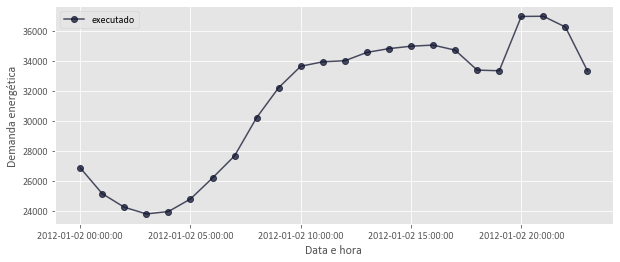

In [7]:
df_demanda_potencia_sample_one_day = df_demanda_potencia[['executado','pico']][df_demanda_potencia['dataref'] == '2012/01/02']

# df_demanda_potencia_sample_one_day.head(24)


# df_demanda_potencia_sample_one_day.plot(
#     y="executado",
#     figsize=(10, 4),
#     title="Demanda de Potência amostra (2012/01/02)",
#     c=dark_blue,
#     alpha=0.75,
# )

df_demanda_potencia_sample_one_day.plot(
    y="executado",
    figsize=(10, 4),
    title="",
    c=dark_blue,
    alpha=0.75,
    marker='o'
)
plt.xlabel("Data e hora")
plt.ylabel("Demanda energética")

plt.show()

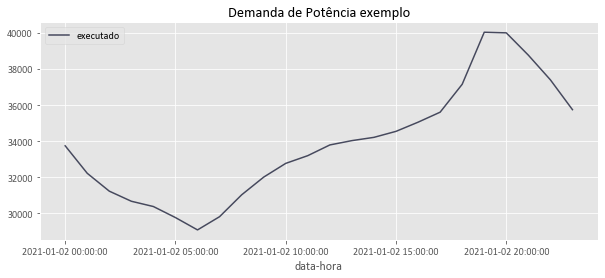

In [8]:
df_demanda_potencia_sample_one_day = df_demanda_potencia[['executado','pico']][df_demanda_potencia['dataref'] == '2021/01/02']

# df_demanda_potencia_sample_one_day.head(24)


df_demanda_potencia_sample_one_day.plot(
    y="executado",
    figsize=(10, 4),
    title="Demanda de Potência exemplo",
    c=dark_blue,
    alpha=0.75,
)
plt.show()

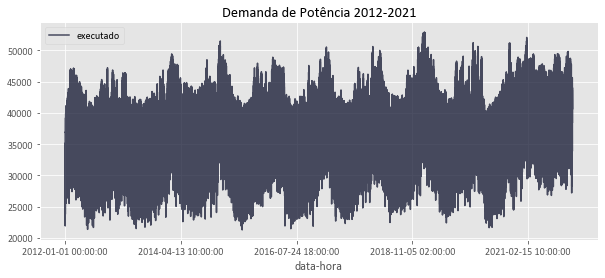

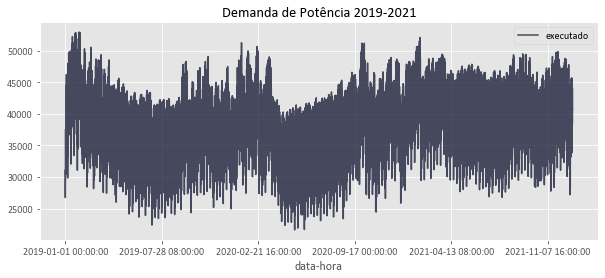

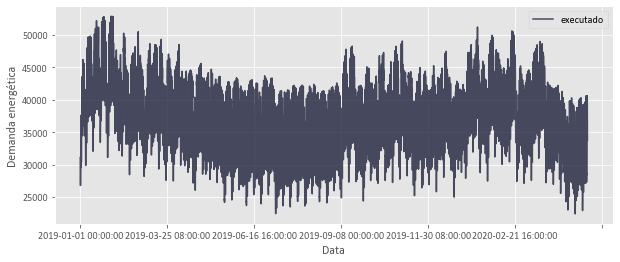

In [9]:
#Plots

# Série toda
df_demanda_potencia.loc["2012-01-01":"2021-12-31"].plot(
    y="executado",
    figsize=(10, 4),
    title="Demanda de Potência 2012-2021",
    c=dark_blue,
    alpha=0.75,
)
plt.show()

# 2019 - 2021
df_demanda_potencia.loc["2019-01-01":"2021-12-31"].plot(
    y="executado",
    figsize=(10, 4),
    title="Demanda de Potência 2019-2021",
    c=dark_blue,
    alpha=0.75,
)
plt.show()

# Efeito Covid
df_demanda_potencia.loc["2019-01-01":"2020-05-01"].plot(
    y="executado",
    figsize=(10, 4),
    # title="Demanda de Potência 2019 - 2020 (Efeito Covid 19)",
    c=dark_blue,
    alpha=0.75,
)

plt.xlabel("Data")
plt.ylabel("Demanda energética")
plt.show()

# df_demanda_potencia.loc["2021-03-01":"2021-04-01"].plot(
#     y="executado",
#     figsize=(10, 4),
#     title="Demanda de Potência Março 2021",
#     c=dark_blue,
#     alpha=0.75,
# )
# plt.show()

# df_demanda_potencia.loc["2021-04-25":"2021-05-01"].plot(
#     y="executado",
#     figsize=(10, 4),
#     title="Demanda de Potência 28/04 - 02/05",
#     c=dark_blue,
#     alpha=0.75,
# )

In [10]:
df_demanda_potencia["DATE"] = pd.to_datetime(df_demanda_potencia.index)
df_demanda_potencia["ORDINAL_DATE"] = df_demanda_potencia["DATE"].apply(
    lambda x: time.mktime(x.timetuple())
)

tmp = df_demanda_potencia.dropna(subset=["executado", "ORDINAL_DATE"])[
    "ORDINAL_DATE"
].values.reshape(-1, 1)

print(tmp)



[[1.3253868e+09]
 [1.3253904e+09]
 [1.3253940e+09]
 ...
 [1.6409952e+09]
 [1.6409988e+09]
 [1.6410024e+09]]


In [11]:
## Modelando o crescimento básico da demanda
df_demanda_potencia["DATE"] = pd.to_datetime(df_demanda_potencia.index)
df_demanda_potencia["ORDINAL_DATE"] = df_demanda_potencia["DATE"].apply(
    lambda x: time.mktime(x.timetuple())
)

lin_regr = LinearRegression(fit_intercept=True)

x = df_demanda_potencia.dropna(subset=["executado", "ORDINAL_DATE"])[
    "ORDINAL_DATE"
].values.reshape(-1, 1)
y = df_demanda_potencia.dropna(subset=["executado", "ORDINAL_DATE"])["executado"].values.reshape(
    -1, 1
)

lin_regr.fit(x, y)
print("LinReg Slope (per timestep):", lin_regr.coef_[0])
print("LinReg Intercept:", lin_regr.intercept_)
print("LinReg Slope (per month):", lin_regr.coef_[0] * 48 * 30)
print("LinReg Slope (per year):", lin_regr.coef_[0] * 48 * 365)


print(lin_regr.coef_[0])



# df_demanda_potencia.head()

LinReg Slope (per timestep): [9.08748983e-06]
LinReg Intercept: [22834.97189732]
LinReg Slope (per month): [0.01308599]
LinReg Slope (per year): [0.15921282]
[9.08748983e-06]


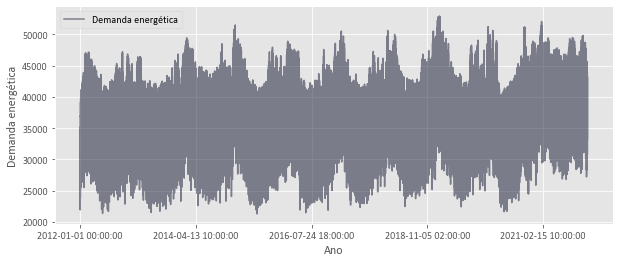

In [12]:
df_demanda_potencia["LINREG"] = lin_regr.predict(
    df_demanda_potencia["ORDINAL_DATE"].values.reshape(-1, 1)
)
ax = df_demanda_potencia.plot(
    y="executado",
    figsize=(10, 4),
    title="",
    # title="Tendência demanda de energia 2012-2020",
    c=dark_blue,
    alpha=0.5,
    label="Demanda energética",
)
# for y in np.arange(2012, 2021):
#     ax.axvline(pd.datetime(y, 1, 1), c=cian, linestyle="--", alpha=0.75)

# df_demanda_potencia.plot(y="LINREG", figsize=(10, 4), c="k", ax=ax, label="Regressão Linear")
ax.set(xlabel='Ano', ylabel='Demanda energética')
plt.show()

c:\Users\augusto.lourencatto\Desktop\me\TCC\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\augusto.lourencatto\Desktop\me\TCC\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\augusto.lourencatto\Desktop\me\TCC\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a fi

[Text(0.5, 0, 'Demanda energética'), Text(0, 0.5, 'Densidade')]

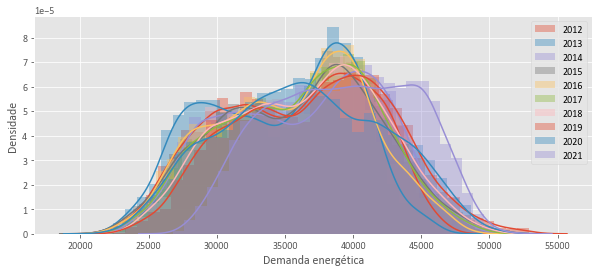

In [13]:
# Criando gráfico de análise da distribuição da probabilidade de demanda

years_to_analyze : list = [2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]

for year in years_to_analyze:

    ax = sns.distplot(
        df_demanda_potencia.loc[f"{year}-01-01":f"{year}-12-31"]["executado"], label=f"{year}"
    )
    
ax.legend()
ax.set(xlabel='Demanda energética', ylabel='Densidade')
# ax.set_title("Distribuição de Probabilidade da Demanda ")

c:\Users\augusto.lourencatto\Desktop\me\TCC\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\augusto.lourencatto\Desktop\me\TCC\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\augusto.lourencatto\Desktop\me\TCC\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a fi

[Text(0.5, 0, 'Hora'), Text(0, 0.5, 'Densidade')]

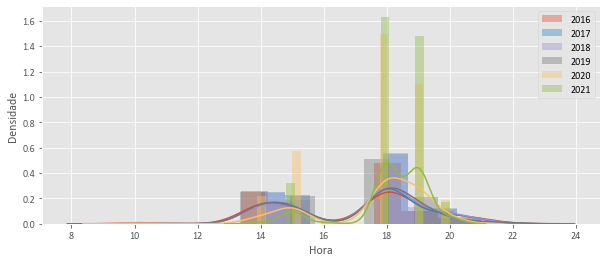

In [14]:
# Criando gráfico de análise do pico de demanda

# years_to_analyze : list = [2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]
years_to_analyze : list = [2016,2017,2018,2019,2020,2021]

df_demanda_pico = df_demanda_potencia[df_demanda_potencia["pico"] == 1].copy()

for year in years_to_analyze:

    ax = sns.distplot(
        df_demanda_pico.loc[f"{year}-01-01":f"{year}-12-31"]["hora"], label=f"{year}",kde=True
    )
    
ax.legend()
ax.set(xlabel='Hora', ylabel='Densidade')
# ax.set_title("Distribuição de Probabilidade do pico de energia ")

In [15]:
# #Plot do primeiro semestre de cada ano
# ax = sns.histplot(
#     df_demanda_pico.loc["2018-01-01":"2018-05-01"]["hora"], label="2018", color=light_blue, kde=True
# )
# sns.histplot(
#     df_demanda_pico.loc["2019-01-01":"2019-05-01"]["hora"], label="2019", color=blue, ax=ax,kde=True
# )
# sns.histplot(
#     df_demanda_pico.loc["2020-01-01":"2020-05-01"]["hora"], label="2020", color=teal, ax=ax,kde=True
# )
# sns.histplot(
#     df_demanda_pico.loc["2021-01-01":"2021-05-01"]["hora"], label="2021", color=black, ax=ax,kde=True
# )

In [16]:
#TODO: Fazer para os dados de temperatura também

In [17]:
#Criando a feature de feriado de mais algumas datas, além das autocorrelacionadas

feriados = holidays.Brazil
dates_of_holidays = []
for date, name in sorted(
    holidays.Brazil(
        years=[2012,2013,2014,2015,2016,2017,2018,2019, 2020, 2021,2022]
    ).items()
):
    dates_of_holidays.append(date)

df_demanda_potencia.index = pd.DatetimeIndex(df_demanda_potencia.index)

df_demanda_potencia['temp'] = df_demanda_potencia.index.to_pydatetime()

# df_demanda_potencia['date'] = df_demanda_potencia['temp'].apply(lambda t: t.date())

df_demanda_potencia["Holiday"] = df_demanda_potencia['temp'].apply(lambda t: 1 if t.date() in dates_of_holidays else 0)
df_demanda_potencia["Quarter"] = df_demanda_potencia["temp"].apply(lambda t: t.quarter)
df_demanda_potencia["DayOfYear"] = df_demanda_potencia["temp"].apply(lambda t: t.dayofyear)
df_demanda_potencia["WeekOfYear"] = df_demanda_potencia["temp"].apply(lambda t: t.weekofyear)

#LAG

df_demanda_potencia['lag_1'] = df_demanda_potencia['executado'].shift(1, freq = 'D')
df_demanda_potencia['lag_7'] = df_demanda_potencia['executado'].shift(7, freq = 'D')
df_demanda_potencia['lag_14'] = df_demanda_potencia['executado'].shift(14, freq = 'D')



df_demanda_potencia['rolling_mean_1'] = df_demanda_potencia['executado'].rolling(window=96).mean()
df_demanda_potencia['rolling_mean_7'] = df_demanda_potencia['executado'].rolling(window=672).mean()
df_demanda_potencia['rolling_mean_14'] = df_demanda_potencia['executado'].rolling(window=1344).mean()


df_demanda_potencia.drop(columns=["temp"], inplace=True)

In [18]:
df_demanda_potencia[['executado','lag_1']][df_demanda_potencia['dataref'] == '2012/02/01'].head(3)

,executado,lag_1
data-hora,,
2012-02-01 00:00:00,33738.15,33936.69
2012-02-01 01:00:00,31389.03,31515.64
2012-02-01 02:00:00,30198.53,29801.54


In [19]:
df_demanda_potencia[['executado','lag_1']][df_demanda_potencia['dataref'] == '2012/02/02'].head(2)

,executado,lag_1
data-hora,,
2012-02-02 00:00:00,35096.36,33738.15
2012-02-02 01:00:00,32715.68,31389.03


In [20]:
df_demanda_potencia[['executado','rolling_mean_1']][df_demanda_potencia['dataref'] == '2012/02/01'].head(3)

,executado,rolling_mean_1
data-hora,,
2012-02-01 00:00:00,33738.15,34368.257500
2012-02-01 01:00:00,31389.03,34370.400833
2012-02-01 02:00:00,30198.53,34376.110417


In [21]:
# REFERENCIA : http://enos.cptec.inpe.br/#
ocorrencias_el_nino : list = [2015,2016] #Forte
ocorrencias_la_nina : list = [2017,2018] #Fraca

df_demanda_potencia['el_nino'] = df_demanda_potencia.apply(lambda t: 1 if t['ano'] in ocorrencias_el_nino else 0,axis=1)
df_demanda_potencia['la_nina'] = df_demanda_potencia.apply(lambda t: 1 if t['ano'] in ocorrencias_la_nina else 0,axis=1)

In [22]:
# Criar feature dizendo se é final de semana ou não

In [23]:
df_demanda_potencia.head()

,executado,data_medicao_A602,hora_medicao_A602,precipitacao_total_A602,pressao_atmosferica_A602,radiacao_global_A602,temperatura_ar_A602,temperatura_ponto_orvalho_A602,umidade_relativa_ar_A602,vento_direcao_A602,...,DayOfYear,WeekOfYear,lag_1,lag_7,lag_14,rolling_mean_1,rolling_mean_7,rolling_mean_14,el_nino,la_nina
data-hora,,,,,,,,,,,,,,,,,,,,,
2012-01-01 00:00:00,28212.46,2012-01-01,0,2.4,1007.3,-2.854,22.9,NaN,NaN,102.0,...,1,52,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2012-01-01 01:00:00,27511.77,2012-01-01,1,1.6,1007.6,-2.053,22.5,NaN,NaN,98.0,...,1,52,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2012-01-01 02:00:00,26339.97,2012-01-01,2,6.0,1006.9,-1.742,22.5,NaN,NaN,105.0,...,1,52,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2012-01-01 03:00:00,25318.01,2012-01-01,3,1.6,1006.0,-2.066,22.6,NaN,NaN,99.0,...,1,52,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2012-01-01 04:00:00,24543.74,2012-01-01,4,0.6,1005.1,-1.992,22.7,NaN,NaN,57.0,...,1,52,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [24]:
df_demanda_potencia.to_csv("./data/checkpoints/df_features_v1.csv")

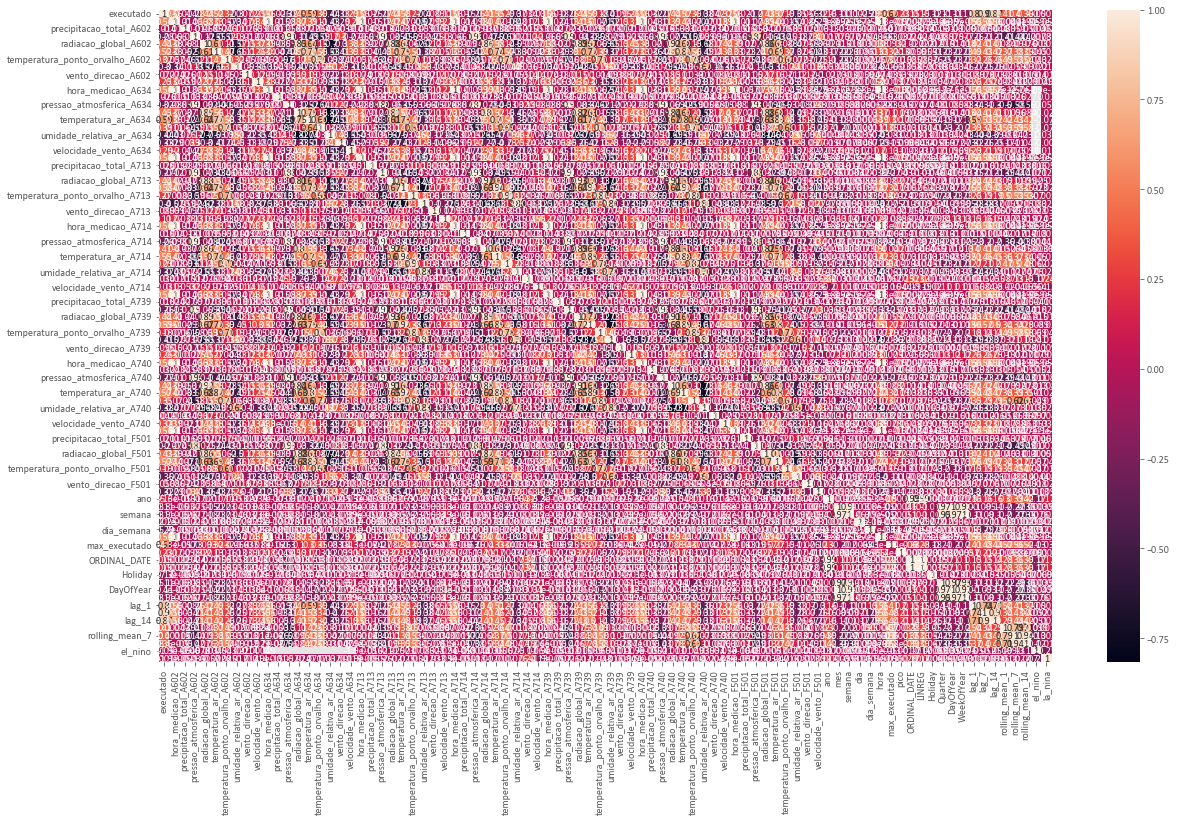

In [25]:
plt.figure(figsize=(20,12))
corr = df_demanda_potencia.corr()
sns.heatmap(corr, annot=True)
plt.show()

In [42]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]


corr_copy = corr.copy()
corr_copy = corr_copy.drop(corr_copy.filter(like='hora').columns, 1)
corr_copy = corr_copy.drop(corr_copy.filter(like='semana').columns, 1)

print("Top Absolute Correlations")
print(get_top_abs_correlations(corr_copy, 20))



Top Absolute Correlations
ORDINAL_DATE              LINREG                      1.000000
DayOfYear                 WeekOfYear                  0.999547
mes                       DayOfYear                   0.999390
                          WeekOfYear                  0.999322
                          Quarter                     0.999317
Quarter                   DayOfYear                   0.998707
                          WeekOfYear                  0.998591
pressao_atmosferica_A713  pressao_atmosferica_A714    0.998553
lag_7                     lag_14                      0.998359
radiacao_global_A713      radiacao_global_A714        0.998255
pressao_atmosferica_A713  pressao_atmosferica_A740    0.998204
radiacao_global_A713      radiacao_global_A739        0.997931
radiacao_global_A602      radiacao_global_A740        0.997791
radiacao_global_A739      radiacao_global_A740        0.997788
radiacao_global_A714      radiacao_global_A739        0.997637
pressao_atmosferica_A713  pre

C:\Users\augusto.lourencatto\AppData\Local\Temp\ipykernel_4900\2044243986.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  corr_copy = corr_copy.drop(corr_copy.filter(like='hora').columns, 1)
C:\Users\augusto.lourencatto\AppData\Local\Temp\ipykernel_4900\2044243986.py:19: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  corr_copy = corr_copy.drop(corr_copy.filter(like='semana').columns, 1)
